In [526]:
import pandas as pd
import numpy as np
import importlib
import util.Data as data_util
import util.DataframeProcess as df_proc
import seaborn as sn
import matplotlib.pyplot as plt

In [527]:
importlib.reload(data_util)
importlib.reload(df_proc)

<module 'util.DataframeProcess' from 'D:\\scul\\uaic-ub\\licenta\\code\\util\\DataframeProcess.py'>

# Data

In [528]:
csv_filename = r'../data_db/final_coordinates-conversion-v2.csv'
df_main = data_util.import_data(csv_filename)

In [529]:
df_data = df_main.copy()
df_data.shape

(1827, 26)

In [530]:
df_data['title'].unique().size

61

## Split wm and reward

In [531]:
df_data = df_main.copy()
mask_wm = df_data['keywords'].str.contains('working memory')

### Working Memory

In [532]:
df_wm = df_data[mask_wm]

In [533]:
df_wm['title'].unique().size

17

In [534]:
importlib.reload(df_proc)
df_wm_proc = df_proc.df_process2(df_wm)
df_wm_proc.head(1)

,title,author,table_name,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A Rapid fMRI Task Battery for Mappin...,Drobyshevsky et al,Table 2 - Sensitivity of tasks and T...,13,31,{2-back > 0-back},"{fMRI, working memory, visual letter..."


### Contrast wm

In [535]:
list_contrast_wm = list(df_proc.list_of_sets_to_set(df_wm_proc, 'contrast_set'))
counter_contrast_wm = data_util.df_counter(df=df_wm_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_wm, order=1)
counter_contrast_wm

{'>nan_values<': 0,
 '1-back > 2-back': 1,
 '2-back > 1-back': 1,
 'n-back > control task': 1,
 'precue > retrocue': 1,
 'retrocue > precue': 1,
 'sub-id > baseline': 1,
 'sub-dif > baseline': 1,
 '1-back > rest': 1,
 'sub-dif > frame-dif': 1,
 'retrocue and precue': 1,
 '2-back > 1-back > 0-back': 2,
 '3-back > 0-back': 2,
 '-': 3,
 '3-back > 2-back > 1-back > 0-back': 3,
 '2-back > 0-back': 9}

In [536]:
# chosen set of contrast
min_val = 2
list_contrast_selection_wm = list(set([key for key in list_contrast_wm if counter_contrast_wm[key] >= min_val]))
# create new col with only selected contrasts
df_wm_proc['selected_contrast'] = df_wm_proc['contrast_set'].apply(
    lambda x: set(x).intersection(list_contrast_selection_wm))

contrast_bool_wm = df_proc.boolean_df(df_wm_proc['selected_contrast'], list_contrast_selection_wm)
contrast_int_wm = contrast_bool_wm.astype(int)
contrast_freq_mat_wm = np.dot(contrast_int_wm.T, contrast_int_wm)

In [537]:
contrast_freq_wm = pd.DataFrame(contrast_freq_mat_wm, columns=list_contrast_selection_wm,
                                index=list_contrast_selection_wm)
# contrast_freq_wm

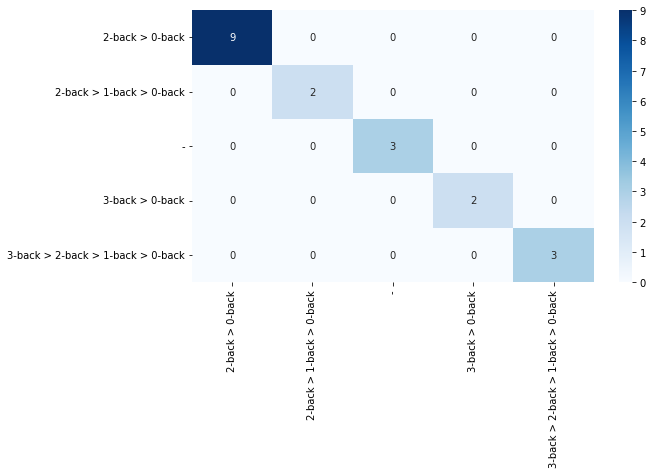

In [538]:
fig, ax = plt.subplots(figsize=(9, 5))
sn.heatmap(contrast_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=50)
plt.savefig("./images/heatmap_contrast_wm.png", dpi=300)

### Keywords wm

In [539]:
counter_keywords_wm = data_util.df_counter(df=df_wm_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'),
                                           order=1)
counter_keywords_wm

{'>nan_values<': 0,
 'reversal learning task': 1,
 'positive reward': 1,
 'two and four choice reversal learning task': 1,
 'visual identical shapes': 1,
 'decision phase': 1,
 'visual facial expression': 1,
 'visual shape color': 1,
 'visual scrambled drawings': 1,
 'verbal': 1,
 'verbal pseudo-words': 1,
 'visual object': 1,
 'Sub-Id': 1,
 'anticipation phase': 1,
 'negative reward': 1,
 'visual shape': 2,
 'Sub-Dif': 2,
 'retrocue': 2,
 'one-back task': 2,
 'visual faces': 2,
 'reward value': 2,
 'precue': 2,
 'visual spatial cue': 3,
 'visual numbers': 3,
 'three-back task': 3,
 'perceptual matching task': 3,
 'experimental task': 3,
 'reading': 3,
 'monetary reward': 4,
 'visual word recognition': 5,
 'decision making': 7,
 'visual letters': 9,
 'two-back task': 10,
 'talairach': 12,
 'MNI': 17,
 'n-back task': 22,
 'working memory': 29,
 'fMRI': 29}

In [540]:
# chosen set of keywords
# list_keywords = list(df_proc.list_of_sets_to_set(df_wm_proc, 'keywords_split'))
list_keywords = [
    'Sub-Dif',
    'Sub-Id',
    'anticipation phase',
    'decision making',
    'decision phase',
    'monetary reward',
    'n-back task',
    'negative reward',
    'one-back task',
    'positive reward',
    'precue',
    'reading',
    'retrocue',
    'reward value',
    'three-back task',
    'two and four choice reversal learning task',
    'two-back task',
    'verbal',
    'verbal pseudo-words',
    'visual faces',
    'visual facial expression',
    'visual identical shapes',
    'visual letters',
    'visual numbers',
    'visual object',
    'visual scrambled drawings',
    'visual shape',
    'visual shape color',
    'visual spatial cue',
    'visual word recognition']

In [541]:
# Filter the keywords based on min value of appearances
min_val = 2
list_keywords_selection_wm = list(set([key for key in list_keywords if counter_keywords_wm[key] >= min_val]))
# create new col with only selected keywords
df_wm_proc['selected_keywords'] = df_wm_proc['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_selection_wm))

keywords_bool_wm = df_proc.boolean_df(df_wm_proc['selected_keywords'], list_keywords_selection_wm)
keywords_int_wm = keywords_bool_wm.astype(int)
keywords_freq_mat_wm = np.dot(keywords_int_wm.T, keywords_int_wm)

In [542]:
keywords_freq_wm = pd.DataFrame(keywords_freq_mat_wm, columns=list_keywords_selection_wm,
                                index=list_keywords_selection_wm)
keywords_freq_wm
#

,visual faces,visual numbers,retrocue,visual word recognition,two-back task,monetary reward,n-back task,visual letters,visual spatial cue,reading,reward value,Sub-Dif,decision making,one-back task,three-back task,precue,visual shape
visual faces,2,0,0,1,2,0,2,0,0,0,0,0,0,0,0,0,0
visual numbers,0,3,0,0,1,0,3,0,0,0,0,0,0,1,1,0,0
retrocue,0,0,2,0,0,0,0,0,2,0,0,0,2,0,0,1,0
visual word recognition,1,0,0,5,2,0,2,0,0,3,0,2,3,0,0,0,0
two-back task,2,1,0,2,10,0,10,4,0,0,0,0,0,0,1,0,0
monetary reward,0,0,0,0,0,4,4,2,0,0,2,0,0,0,0,0,2
n-back task,2,3,0,2,10,4,22,9,0,0,2,0,0,2,3,0,2
visual letters,0,0,0,0,4,2,9,9,0,0,2,0,0,1,2,0,0
visual spatial cue,0,0,2,0,0,0,0,0,3,0,0,0,3,0,0,2,0
reading,0,0,0,3,0,0,0,0,0,3,0,2,3,0,0,0,0


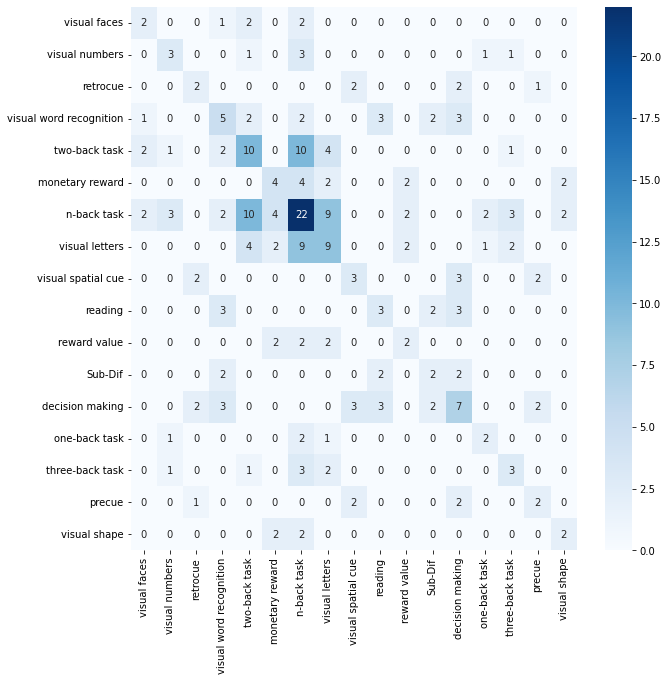

In [543]:
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(keywords_freq_wm, cmap="Blues",annot=True, fmt="d")
plt.savefig("./images/heatmap_keywords_wm.png", dpi=300)

### Keywords and Contrast wm

In [544]:
list_cnt_key_selection_wm = list_contrast_selection_wm + list_keywords_selection_wm
cnt_key_int_wm = pd.merge(contrast_int_wm, keywords_int_wm, left_index=True, right_index=True).astype(int)
cnt_key_freq_mat_wm = np.dot(cnt_key_int_wm.T, cnt_key_int_wm)

In [545]:
cnt_key_freq_wm = pd.DataFrame(cnt_key_freq_mat_wm, columns=list_cnt_key_selection_wm, index=list_cnt_key_selection_wm)

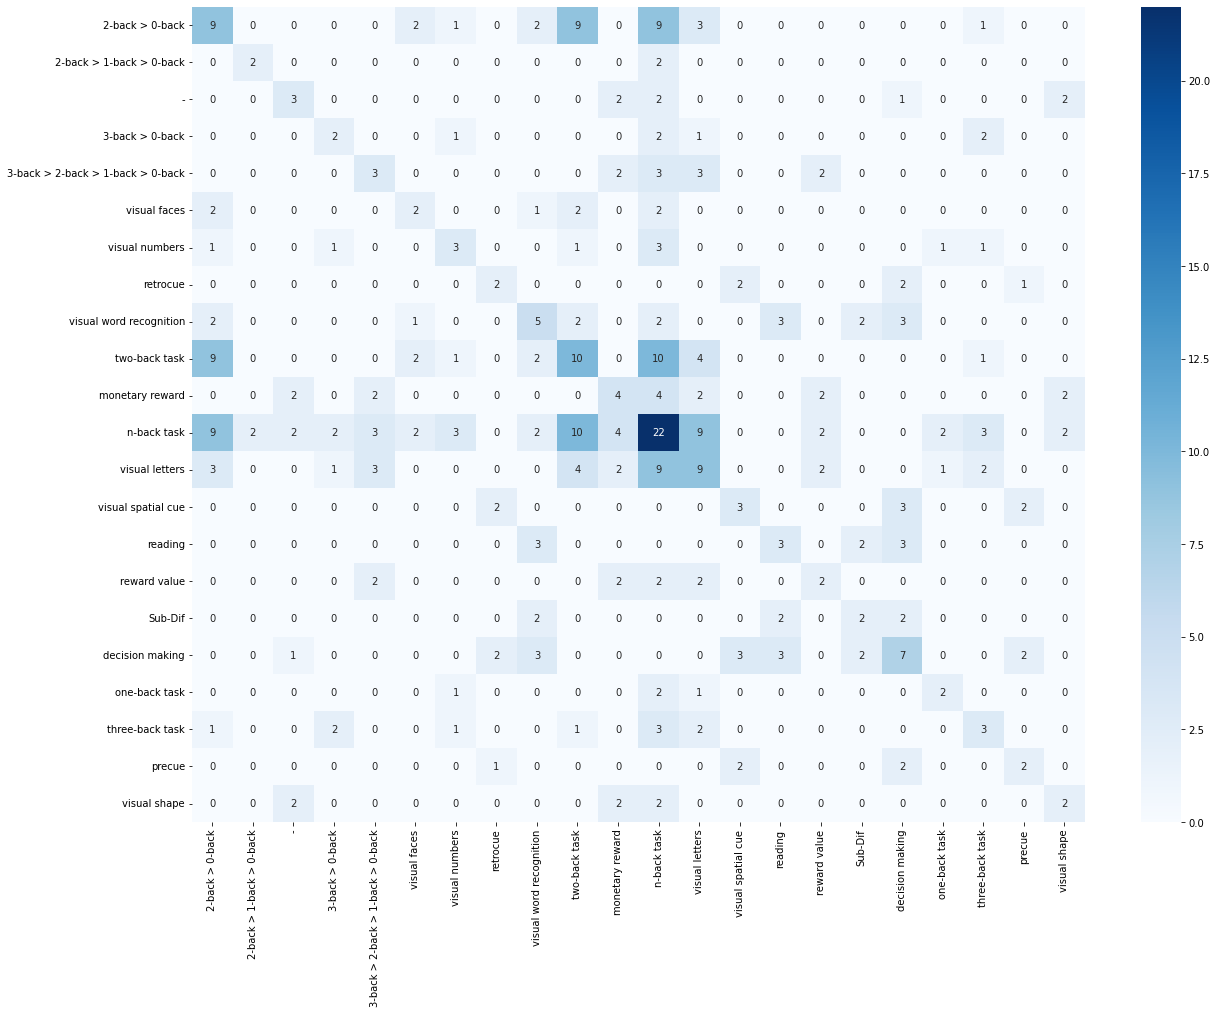

In [546]:
fig, ax = plt.subplots(figsize=(20, 15))
sn.heatmap(cnt_key_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_cnt_key_wm.png", dpi=300)

### Keywords wm - n-back and visual tasks

In [547]:
list_keywords_selection_wm_stimulus = {
    'verbal',
    'verbal pseudo-words',
    'visual faces',
    'visual facial expression',
    'visual identical shapes',
    'visual letters',
    'visual numbers',
    'visual object',
    'visual scrambled drawings',
    'visual shape',
    'visual shape color',
    'visual spatial cue',
    'visual word recognition'
}

In [548]:
df_wm_proc2= df_wm_proc.copy()
df_wm_proc2['selected_keywords_reward_type'] = df_wm_proc2['keywords_split'].apply(
    lambda x: set(el.split(" ")[0] for el in set(x).intersection(list_keywords_selection_wm_stimulus)))

In [549]:
list_keywords_wm_nback = ['n-back task']
list_keywords_wm_stimulus=['verbal','visual']

#### Task Modality N-BACK

In [550]:
df_wm_proc2['selected_key1'] = df_wm_proc2['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_wm_nback))

keywords_bool_wm_nback = df_proc.boolean_df(df_wm_proc2['selected_key1'], list_keywords_wm_nback)
keywords_int_wm_nback = keywords_bool_wm_nback.astype(int)
keywords_freq_mat_wm_nback = np.dot(keywords_int_wm_nback.T, keywords_int_wm_nback)

In [551]:
keywords_freq_wm_nback = pd.DataFrame(keywords_freq_mat_wm_nback, columns=list_keywords_wm_nback,
                                index=list_keywords_wm_nback)
keywords_freq_wm_nback

,n-back task
n-back task,22


#### Task Stimulus visual

In [552]:
keywords_bool_wm_stimulus = df_proc.boolean_df(df_wm_proc2['selected_keywords_reward_type'], list_keywords_wm_stimulus)
keywords_int_wm_stimulus = keywords_bool_wm_stimulus.astype(int)
keywords_freq_mat_wm_stimulus = np.dot(keywords_int_wm_stimulus.T, keywords_int_wm_stimulus)

In [553]:
keywords_freq_wm_stimulus = pd.DataFrame(keywords_freq_mat_wm_stimulus, columns=list_keywords_wm_stimulus,
                                index=list_keywords_wm_stimulus)
keywords_freq_wm_stimulus

,verbal,visual
verbal,2,0
visual,0,27


#### Both Task Modality N-BACK and Task Stimulus visual

In [554]:
list_stmod_wm = list_keywords_wm_stimulus+list_keywords_wm_nback
stmod_int_wm = pd.merge(keywords_int_wm_stimulus, keywords_int_wm_nback, left_index=True, right_index=True).astype(int)
stmod_freq_mat_wm = np.dot(stmod_int_wm.T, stmod_int_wm)
stmod_freq_wm = pd.DataFrame(stmod_freq_mat_wm, columns=list_stmod_wm, index=list_stmod_wm)

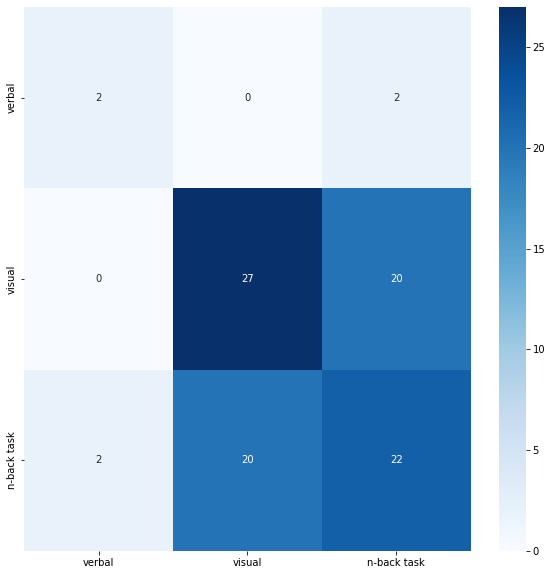

In [555]:
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(stmod_freq_wm, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_sel1_wm.png", dpi=300)

## Reward magnitude and type

In [556]:
df_reward = df_data[~mask_wm]

In [557]:
df_reward['title'].unique().size

46

In [583]:
df_reward['table_name'].unique().size

140

In [558]:
df_reward_proc = df_proc.df_process2(df_reward)
df_reward_proc.head(1)

,title,author,table_name,Number of Foci,Number of Subjects,contrast_set,keywords_split
0,A functional neuroimaging study of m...,Taylor et al,Table 3-2 - Activation foci for the ...,6,12,{-},"{anticipation phase, MNI, fMRI, rewa..."


### Contrast reward

In [559]:
list_contrast_reward = list(df_proc.list_of_sets_to_set(df_reward_proc, 'contrast_set'))
counter_contrast_reward = data_util.df_counter(df=df_reward_proc.explode('contrast_set'), column='contrast_set',
                                           set_keywords=list_contrast_reward, order=1)
counter_contrast_reward

{'>nan_values<': 0,
 'lose > no reward': 1,
 'win > lose and risk > safe': 1,
 'decision-making > control task': 1,
 'advantageous > disadvantageous': 1,
 'reward > negative feedback': 1,
 'ar switch > stay and sr switch > stay': 1,
 'movement > no movement': 1,
 'all w > all l': 1,
 'safe > risk': 1,
 'low-calorie > high-calorie': 1,
 'ar; sr > neutral activity': 1,
 'stroop block > baseline': 1,
 'reward during run of success': 1,
 'l4 > l1': 1,
 'win after losing streak > w1': 1,
 'choice > no choice': 1,
 'loss after winning streak > l1': 1,
 'beautiful male > average male': 1,
 'penalty during run of failure': 1,
 'reward during run of success and penalty during run of failure': 1,
 'social reward magnitude': 1,
 'monetary reward > social reward': 1,
 'movement > no movement and reward > no reward': 1,
 'monetary reward > erotic reward': 1,
 'punishment > no reward': 1,
 'w4 > w1': 1,
 'negative correlation with reward level': 1,
 'social reward > monetary reward': 1,
 'high rewar

In [580]:
# chosen set of contrast
min_val = 5
list_contrast_selection_reward = list(set([key for key in list_contrast_reward if counter_contrast_reward[key] >= min_val]))
# create new col with only selected contrasts
df_reward_proc['selected_contrast'] = df_reward_proc['contrast_set'].apply(
    lambda x: set(x).intersection(list_contrast_selection_reward))

contrast_bool_reward = df_proc.boolean_df(df_reward_proc['selected_contrast'], list_contrast_selection_reward)
contrast_int_reward = contrast_bool_reward.astype(int)
contrast_freq_mat_reward = np.dot(contrast_int_reward.T, contrast_int_reward)

In [581]:
contrast_freq_reward = pd.DataFrame(contrast_freq_mat_reward, columns=list_contrast_selection_reward,
                                index=list_contrast_selection_reward)
# contrast_freq_reward

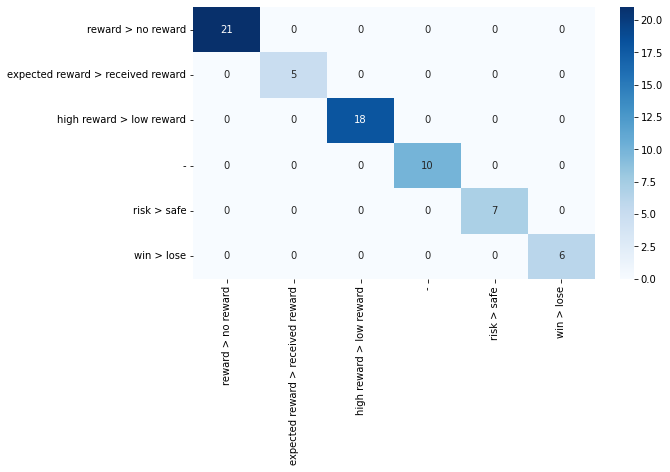

In [582]:
fig, ax = plt.subplots(figsize=(9, 5))
sn.heatmap(contrast_freq_reward, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=50)
plt.savefig("./images/heatmap_contrast_reward.png", dpi=300)


### Keywords reward

In [563]:
counter_keywords_reward = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split'),
                                           order=1)
counter_keywords_reward

{'>nan_values<': 0,
 'fractal image': 1,
 'safe choice': 1,
 'decreasing activation': 1,
 'potential loss': 1,
 'low calorie': 1,
 'feedback reward': 1,
 'verbal reward': 1,
 'negative expectancy': 1,
 'modelling prediction error': 1,
 'conditioning task': 1,
 'monetary and erotic reward': 1,
 'inhibition': 1,
 'time conditioning': 1,
 'positive expectancy': 1,
 'high calorie': 1,
 'erotic reward': 1,
 'increasing activation': 1,
 'probability': 1,
 'Stroop task': 1,
 'chocolate bars': 2,
 'movement': 2,
 'potential gain': 2,
 'time effect': 2,
 'visual shape color': 2,
 'reinforcement learning': 2,
 'increasing reward uncertainty': 2,
 'face stimuli': 2,
 'increasing reward magnitude': 2,
 'effect of reward': 2,
 'dopamine': 3,
 'reversal learning': 3,
 'visual object': 3,
 'extraversion': 3,
 'high vs low calorie food': 3,
 'response maintenance': 3,
 'visual shape': 3,
 'task switching': 3,
 'response switching': 3,
 'high gain vs high loss': 3,
 'SID': 4,
 'Balloon Analog Risk Task

### Obtain reduce list of keywords - rewards type

In [564]:
set_keywords_reward_type = set([el for el in df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split') if el.find('reward') != -1])
counter_keywords_reward_type = data_util.df_counter(df=df_reward_proc.explode('keywords_split'), column='keywords_split',
                                           set_keywords=set_keywords_reward_type,
                                           order=1)
counter_keywords_reward_type


{'>nan_values<': 0,
 'feedback reward': 1,
 'monetary and erotic reward': 1,
 'erotic reward': 1,
 'verbal reward': 1,
 'increasing reward magnitude': 2,
 'effect of reward': 2,
 'increasing reward uncertainty': 2,
 'food photo reward': 4,
 'taste reward': 6,
 'context-dependent reward': 8,
 'negative reward': 11,
 'social reward': 16,
 'positive reward': 22,
 'reward magnitude': 41,
 'reward value': 59,
 'monetary reward': 111}

### Check elements

In [565]:
############
check_set = ['reversal learning']
pd.set_option('display.max_colwidth', None)  # to show all the column values
mask = df_proc.check_column_elem(df=df_reward_proc,colummn_name='keywords_split',check_set=check_set)
df_reward_proc[mask]

,title,author,table_name,Number of Foci,Number of Subjects,contrast_set,keywords_split,selected_contrast
39,Determining a Role for Ventromedial Prefrontal Cortex in Encoding Action-Based Value Signals During Reward-Related Decision Making,Glascher et al,Table 1-1 Coordinates and significance levels for contrasts - Conjunction of Vchosen for AR and SR (AR = action-based reversal learning; SR = stimulus-based reversal learning),16,20,{ar; sr > neutral activity},"{reinforcement learning, fractal image, fMRI, reversal learning, monetary reward, outcome phase, decision making, MNI}",{}
40,Determining a Role for Ventromedial Prefrontal Cortex in Encoding Action-Based Value Signals During Reward-Related Decision Making,Glascher et al,Table 1-2 Coordinates and significance levels for contrasts - Conjunction of AR Switch > Stay and SR Switch > Stay (AR = action-based reversal learning; SR = stimulus-based reversal learning),4,20,{ar switch > stay and sr switch > stay},"{reinforcement learning, task switching, fMRI, reversal learning, monetary reward, outcome phase, decision making, MNI}",{}
132,Role of the Medial Prefrontal Cortex in Impaired Decision Making in Juvenile Attention-Deficit-Hyperactivity Disorder,Hauser et al,Table 2 - Group Differences Between Patients With ADHD and Healthy Adolescents for reward prediction error (RPE) outcome - healthy>adhd,12,20,{expected reward > received reward and control > adhd},"{task switching, fMRI, reversal learning, monetary reward, outcome phase, decision making, visual object, MNI}",{}


In [566]:
pd.set_option('display.max_colwidth', 40)
#############

### Obtain reduce list of keywords

In [567]:
set_keywords = df_proc.list_of_sets_to_set(df_reward_proc, 'keywords_split').difference(set_keywords_reward_type)
set_keywords

{'Balloon Analog Risk Task',
 'MID',
 'MNI',
 'SID',
 'Stroop task',
 'adult',
 'anova',
 'anticipation phase',
 'chocolate bars',
 'conditioning task',
 'cups task',
 'decision making',
 'decision phase',
 'decreasing activation',
 'dopamine',
 'extraversion',
 'fMRI',
 'face stimuli',
 'food',
 'fractal image',
 'gambling',
 'high calorie',
 'high gain vs high loss',
 'high incentive',
 'high vs low calorie food',
 'increasing activation',
 'inhibition',
 'low calorie',
 'modelling prediction error',
 'movement',
 'n-back task',
 'negative expectancy',
 'outcome phase',
 'passive',
 'performance-dependent',
 'positive expectancy',
 'potential gain',
 'potential loss',
 'probability',
 'reinforcement learning',
 'response maintenance',
 'response switching',
 'reversal learning',
 'risk choice',
 'safe choice',
 'small incentive',
 'talairach',
 'task switching',
 'time conditioning',
 'time effect',
 'viewing',
 'visual cards',
 'visual color pies with probabilities',
 'visual cue',


In [568]:
set_reward_type = {
    'erotic reward',
    'verbal reward',
    'monetary and erotic reward',
    'feedback reward',
    'taste reward',
    'context-dependent reward',  # maybe get it out
    'social reward',
    'food photo reward',
    'monetary reward'}

set_reward_contingency = {
    # 'viewing',  ## should be where is passive
    'passive',
    'gambling',
    'performance-dependent',
    'reversal learning',
    'n-back task'  # check this
}

set_reward_phase = {
    'anticipation phase',
    'decision phase',
    'outcome phase',
}

set_reward_decision_making = {
    'decision making'
}

In [569]:
set_reward_influence = {
    'negative reward',
    'positive reward',
}
set_keywords_others = {
    'safe choice',
    'risk choice',
    'positive expectancy',
    'negative expectancy',
}

# list_keywords_rewards = [set_reward_type,set_reward_contingency,set_reward_phase,set_reward_decision_making,set_reward_influence,set_keywords_others]
# set_keywords_selection_reward = set().union(*list_keywords_rewards)
# set_keywords_selection_reward
## Keep order
list_keywords_rewards = list(set_reward_type) + list(set_reward_contingency) + list(set_reward_phase) + list(set_reward_decision_making) + list(set_reward_influence) + list(set_keywords_others)
list_keywords_rewards

['feedback reward',
 'monetary reward',
 'food photo reward',
 'erotic reward',
 'verbal reward',
 'context-dependent reward',
 'social reward',
 'monetary and erotic reward',
 'taste reward',
 'reversal learning',
 'n-back task',
 'passive',
 'performance-dependent',
 'gambling',
 'anticipation phase',
 'outcome phase',
 'decision phase',
 'decision making',
 'negative reward',
 'positive reward',
 'safe choice',
 'risk choice',
 'positive expectancy',
 'negative expectancy']

In [570]:
# Filter the keywords based on min value of appearances
min_val = 5
# list_keywords_selection_reward = list(set([key for key in list_keywords_rewards if counter_keywords_reward[key] >= min_val]))
list_keywords_selection_reward = [key for key in list_keywords_rewards if counter_keywords_reward[key] >= min_val]
# create new col with only selected keywords
df_reward_proc['selected_keywords'] = df_reward_proc['keywords_split'].apply(
    lambda x: set(x).intersection(list_keywords_selection_reward))

keywords_bool_reward = df_proc.boolean_df(df_reward_proc['selected_keywords'], list_keywords_selection_reward)
keywords_int_reward = keywords_bool_reward.astype(int)
keywords_freq_mat_reward = np.dot(keywords_int_reward.T, keywords_int_reward)

In [571]:
keywords_freq_reward = pd.DataFrame(keywords_freq_mat_reward, columns=list_keywords_selection_reward,
                                index=list_keywords_selection_reward)
# keywords_freq_reward

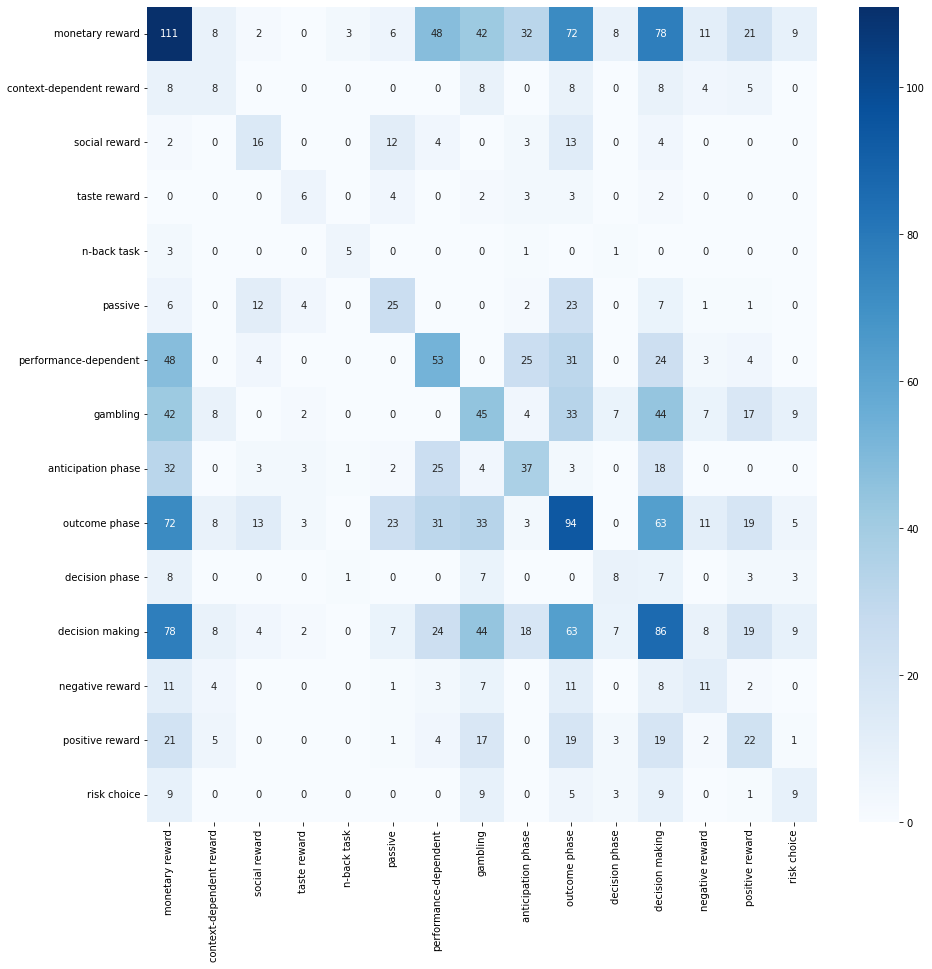

In [572]:
fig, ax = plt.subplots(figsize=(15, 15))
sn.heatmap(keywords_freq_reward, cmap="Blues",annot=True, fmt="d")
plt.savefig("./images/heatmap_keywords_reward.png", dpi=300)

### Keywords and Contrast reward

In [573]:
list_cnt_key_selection_reward = list_contrast_selection_reward + list(list_keywords_selection_reward)
cnt_key_int_reward = pd.merge(contrast_int_reward, keywords_int_reward, left_index=True, right_index=True).astype(int)
cnt_key_freq_mat_reward = np.dot(cnt_key_int_reward.T, cnt_key_int_reward)

In [574]:
cnt_key_freq_reward = pd.DataFrame(cnt_key_freq_mat_reward, columns=list_cnt_key_selection_reward, index=list_cnt_key_selection_reward)

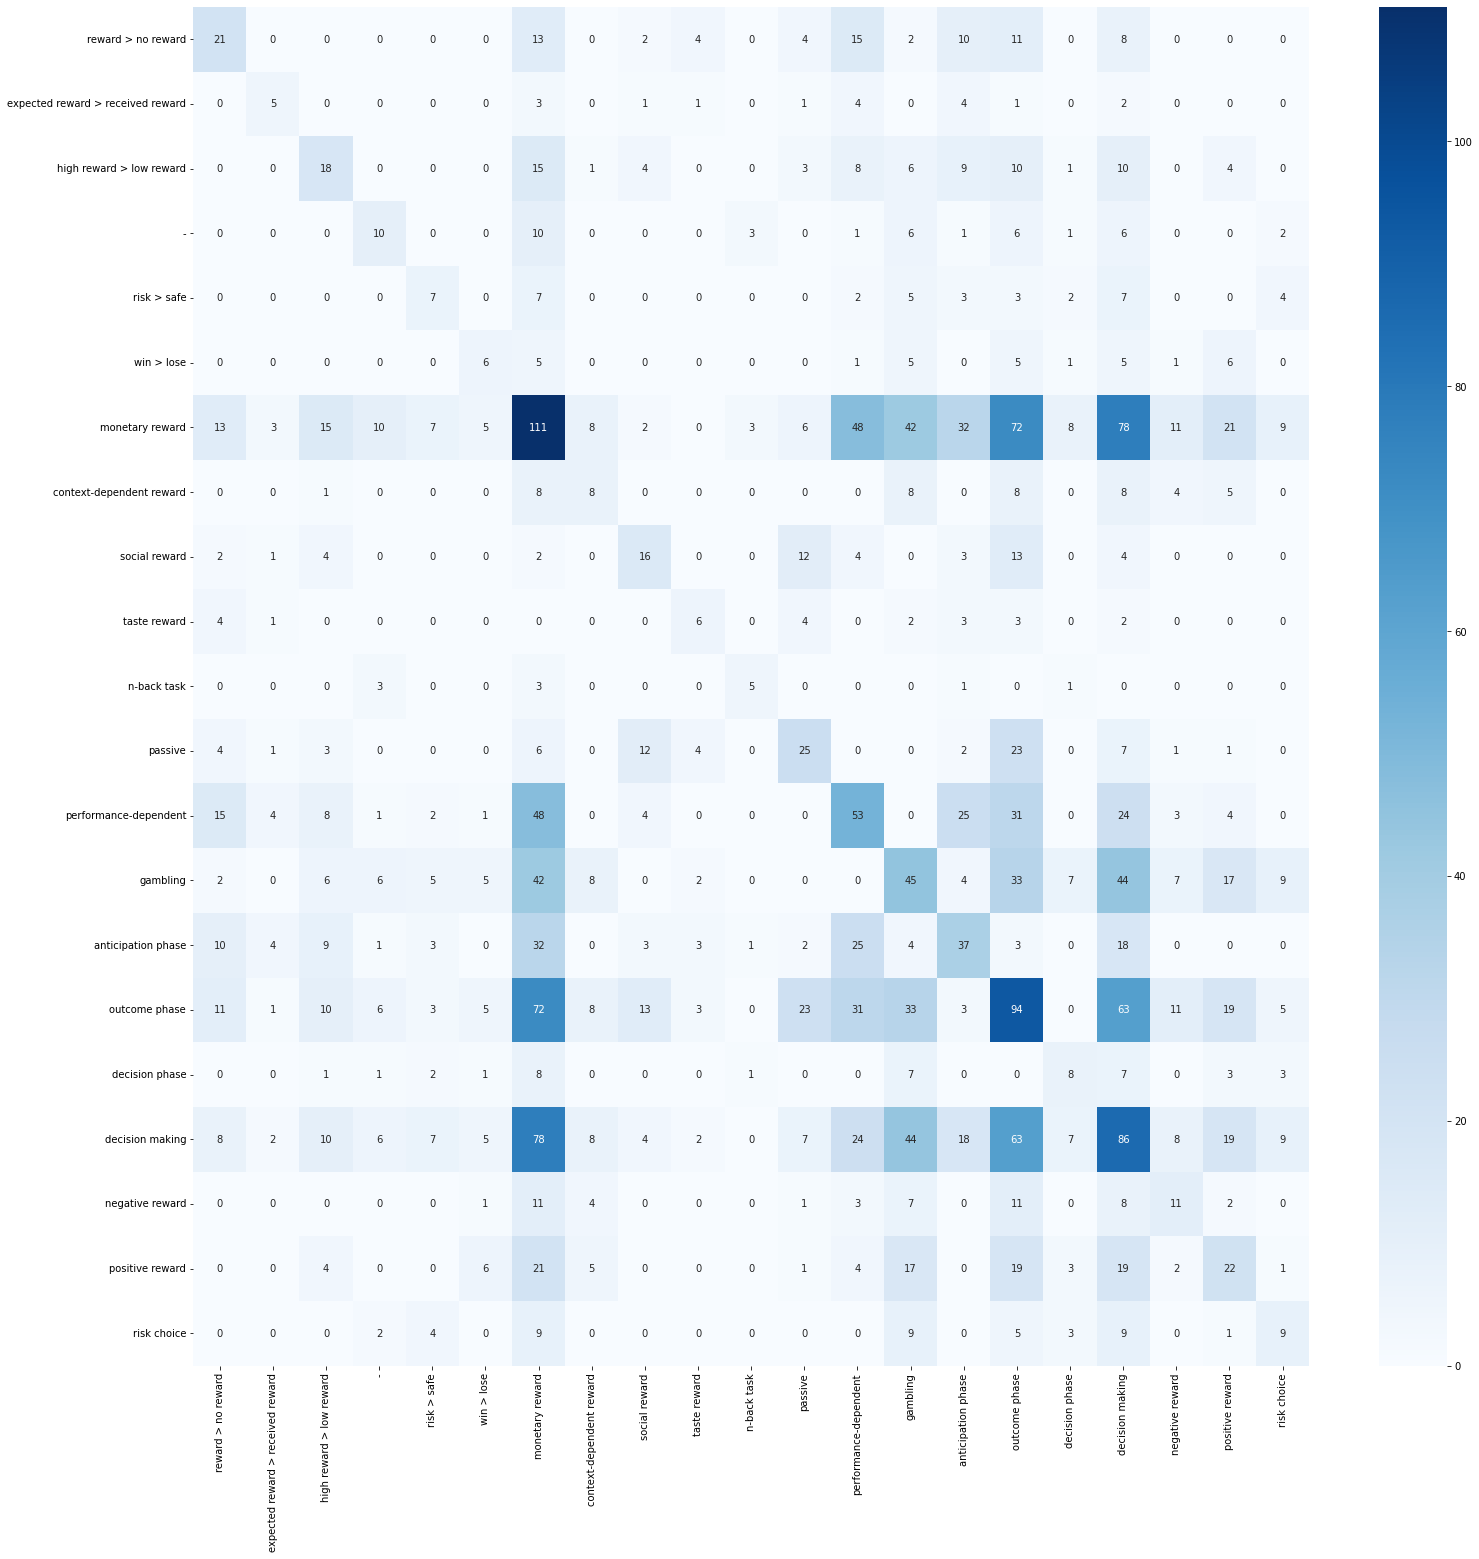

In [575]:
fig, ax = plt.subplots(figsize=(25, 25))
sn.heatmap(cnt_key_freq_reward, cmap="Blues",annot=True, fmt="d")
# plt.xticks(rotation=60)
plt.savefig("./images/heatmap_cnt_key_reward.png", dpi=300)

